## Importações iniciais

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter
from itertools import combinations

%matplotlib inline

## Tarefa 01 - Juntar os arquivos de Vendas
Os arquivos do dataset englobam doze meses de vendas e estão separados em arquivos .csv

In [2]:
#Os arquivos de vendas estão separados por mês
df = pd.read_csv('Sales_Data\Sales_August_2019.csv')

In [3]:
#vendas do mes de Agosto
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101"
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001"
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035"
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001"
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001"
...,...,...,...,...,...,...
12006,248146,Bose SoundSport Headphones,1,99.99,08/29/19 22:19,"868 Hickory St, San Francisco, CA 94016"
12007,248147,AAA Batteries (4-pack),3,2.99,08/31/19 16:26,"206 Lakeview St, Boston, MA 02215"
12008,248148,AA Batteries (4-pack),1,3.84,08/02/19 07:25,"568 13th St, Seattle, WA 98101"
12009,248149,USB-C Charging Cable,1,11.95,08/08/19 12:10,"495 Walnut St, San Francisco, CA 94016"


Assim, precisamos juntar todos os arquivos de vendas em um único DataFrame.
Inicialmente, vamos criar uma variável (lista) com o nome de todos os arquivo .csv que queremos juntar

In [4]:
#Criar uma arquivo com todos os nomes dos .csv da pasta trabalhada
filepaths = [f for f in os.listdir("Sales_Data") if f.endswith('.csv')]

Depois, vamos ler cada um desses aqruivos, colocar em uma lista e concatenar em um único DataFrame

In [5]:
#Ler e concatenar todos os df.
flist = []                      #cria uma variável lista para armazenar os df.
for filename in filepaths:      #faz a leitura de cada arquivo .csv
    df_f = pd.read_csv(f'Sales_Data\{filename}', index_col=False, header=0)
    flist.append(df_f)          #acrescenta o arquivo à lista criada

    
df = pd.concat(flist, axis=0, ignore_index=False)   #concatena os arquivos da lista e um único dataframe

In [6]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


Verifcamos que o DataFrame completo possui 186850 entradas, porém apenas 186305 são não-nulas. Assim, precisaremos limpar as informações indesejadas.

## Tarefa 02 - Limpeza do Dataset

Vemos que todas as colunas são do tipo 'object', ou seja, são strings. Precisamos modificar os tipos de dados para que as informações numéricas sejam representativas daquilo que queremos mostrar e que possamos realizar manipulações corretas destes dados.

Vamos começar pela coluna Quantity Ordered

In [8]:
df['Quantity Ordered'].unique()

array(['2', nan, '1', '3', '5', 'Quantity Ordered', '4', '7', '6', '8',
       '9'], dtype=object)

Vemos que existem dados NaN e por algum motivo o nome da coluna aparece também como entrada de dados.

In [9]:
df.loc[df['Quantity Ordered'] == 'Quantity Ordered']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
10000,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
10387,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
11399,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
11468,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


Assim, vamos remover estas entradas do dataframe:

In [10]:
df = df.loc[df['Quantity Ordered'] != 'Quantity Ordered']

In [11]:
df['Quantity Ordered'].unique()

array(['2', nan, '1', '3', '5', '4', '7', '6', '8', '9'], dtype=object)

Podemos fazer o mesmo para NaN

In [12]:
df[df.isna().any(axis=1)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
10012,NaN,NaN,NaN,NaN,NaN,NaN
10274,NaN,NaN,NaN,NaN,NaN,NaN
10878,NaN,NaN,NaN,NaN,NaN,NaN
11384,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df = df.dropna()

In [14]:
df['Quantity Ordered'].unique()

array(['2', '1', '3', '5', '4', '7', '6', '8', '9'], dtype=object)

In [15]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185950 non-null  object
 1   Product           185950 non-null  object
 2   Quantity Ordered  185950 non-null  object
 3   Price Each        185950 non-null  object
 4   Order Date        185950 non-null  object
 5   Purchase Address  185950 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


Agora verificamos que todos os dados do data set são não nulos e, no que diz respeito à Quantity Ordered, estão de acordo com o esperado. Podemos transformar o tipo de dado para numérico (INT)

In [17]:
df['Quantity Ordered'] = df['Quantity Ordered'].astype(int)

Aproveitando, vamos transformar também os dados da coluna Price Each, que representa o valor individual de cada item

In [18]:
df['Price Each'] = df['Price Each'].astype(float)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int32  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
dtypes: float64(1), int32(1), object(4)
memory usage: 9.2+ MB


Agora, podemos trabalhar com a data. Como vemos, a coluna Order Date também apresenta as informações em formato object. Assim, para realizarmos análises temporais, precisamos transformar esta coluna em um formato reconhecivel como data.

In [20]:
#Transformar a coluna Order Date para datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [21]:
#Criar uma nova coluna que vai conter apenas o mês (texto)
df['Order Month'] = df['Order Date'].dt.strftime('%B')

In [22]:
#Criar uma coluna que vai conter o dia da semana
df['Order Week_Day'] = df['Order Date'].dt.strftime('%A')

In [23]:
#Criar uma coluna que vai conter o mes (numero)
df['Order Month_num'] = df['Order Date'].dt.strftime('%m')

In [24]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month,Order Week_Day,Order Month_num
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",April,Friday,04
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",April,Sunday,04
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,Friday,04
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,Friday,04
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",April,Tuesday,04


Com a limpeza finalizada, podemos começar a responder algumas questões de negócio.

#### Pergunta 01: Qual o melhor mês para vendas? Quão o valor ganho neste mês?

Precisamos criar uma coluna com a soma total dos produtos vendidos. Vemos que temos o preço unitário e a quantidade comprada em cada pedido. Assim, basta multiplicar as duas colunas

In [25]:
df['Price Total'] = df['Price Each']*df['Quantity Ordered']

In [26]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month,Order Week_Day,Order Month_num,Price Total
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",April,Friday,04,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",April,Sunday,04,99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,Friday,04,600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,Friday,04,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",April,Tuesday,04,11.99


Agora podemos somar a quantidade vendida por mês.

In [27]:
month_sale = df.groupby(['Order Month_num','Order Month'])[['Price Total']].sum().sort_values(by = 'Order Month_num')
month_sale

,,Price Total
Order Month_num,Order Month,
01,January,1822256.73
02,February,2202022.42
03,March,2807100.38
04,April,3390670.24
05,May,3152606.75
06,June,2577802.26
07,July,2647775.76
08,August,2244467.88
09,September,2097560.13


Vemos que o melhor mês para vendas foi Dezembro, com $ 4.613.446,34 vendidos

Vamos pplotar para facilitar a visualização e comparação entre os meses

<Axes: xlabel='Order Month_num,Order Month'>

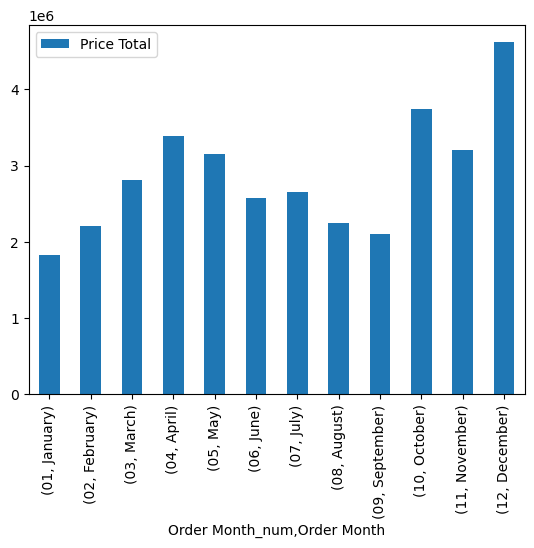

In [28]:
month_sale.plot.bar()

#### Pergunta 02: Qual cidade teve a maior quantidade de vendas?

Vamos inicialmente obter uma nova coluna apenas com o nome da cidade.

In [29]:
#Primeiro vamos criar uma função que, a partir de um texto, pega a string
#entre virgulas (sabemos que neste dataframe a cidade está entre virgulas)
def get_city(txt):
    return txt.split(',')[1].lstrip()


In [30]:
#verificando se está correto
get_city('917 1st St, Dallas, TX 75001')

'Dallas'

In [31]:
#aplicando no dataframe
df['Purchase City'] = df['Purchase Address'].apply(get_city)

In [32]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month,Order Week_Day,Order Month_num,Price Total,Purchase City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",April,Friday,04,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",April,Sunday,04,99.99,Boston
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,Friday,04,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,Friday,04,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",April,Tuesday,04,11.99,Los Angeles


Como podem existir cidades com o mesmo nome em diferentes estados, vamos criar uma coluna com a sigla de cada estado, diferenciando as cidades.

In [33]:
def get_state(txt):
    return txt.split(',')[2][0:3].lstrip()

In [34]:
get_state('917 1st St, Dallas, TX 75001')

'TX'

In [35]:
#aplicando no dataframe
df['Purchase State'] = df['Purchase Address'].apply(get_state)

In [36]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month,Order Week_Day,Order Month_num,Price Total,Purchase City,Purchase State
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",April,Friday,04,23.90,Dallas,TX
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",April,Sunday,04,99.99,Boston,MA
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,Friday,04,600.00,Los Angeles,CA
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,Friday,04,11.99,Los Angeles,CA
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",April,Tuesday,04,11.99,Los Angeles,CA


Agora, podemos verificar a cidade com mais vendas

In [37]:
city_sale = df.groupby(['Purchase State','Purchase City'])[['Price Total']].sum().sort_values(by = 'Price Total', ascending = False)
city_sale

Price Total
Purchase State Purchase City             
CA             San Francisco   8262203.91
               Los Angeles     5452570.80
NY             New York City   4664317.43
MA             Boston          3661642.01
GA             Atlanta         2795498.58
TX             Dallas          2767975.40
WA             Seattle         2747755.48
OR             Portland        1870732.34
TX             Austin          1819581.75
ME             Portland         449758.27

Com isso, verificamos que a cidade com maior numero de vendas foi San Francisco, com $8.262.203,91. E verificamos que existe uma cidade de Portland no estado do Maine e outra no estado do Oregon.

<Axes: xlabel='Purchase State,Purchase City'>

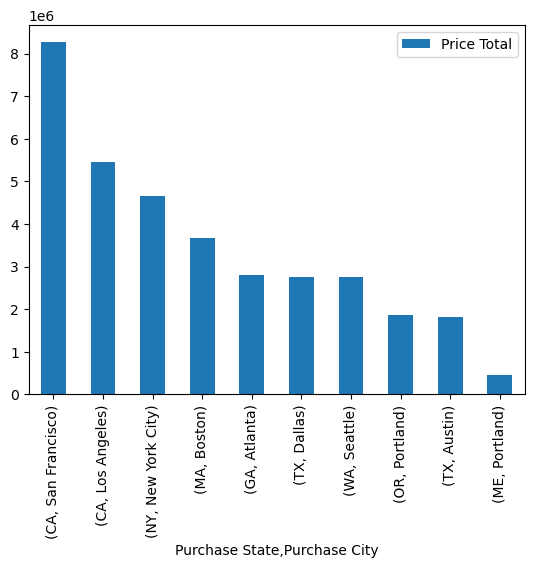

In [38]:
city_sale.plot.bar()

#### Pergunta 3: Visando melhorar as vendas, qual o melhor horário para campanhas de marketing e anúncio de produtos? (Qual o melhor horário para vendas?)

Inicialmente, precisamos criar uma coluna com a hora do dia. Como já transformamos a coluna Order Date para o formato datetime, podemos criar a coluna de hora.

In [39]:
df['Order Hour'] = df['Order Date'].dt.strftime('%H')

In [40]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month,Order Week_Day,Order Month_num,Price Total,Purchase City,Purchase State,Order Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",April,Friday,04,23.90,Dallas,TX,08
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",April,Sunday,04,99.99,Boston,MA,22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,Friday,04,600.00,Los Angeles,CA,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,Friday,04,11.99,Los Angeles,CA,14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",April,Tuesday,04,11.99,Los Angeles,CA,09


Agora, vamos agrupar as quantidade vendida pela hora do dia

In [41]:
hour_sale = df.groupby(['Order Hour'])[['Quantity Ordered']].sum().sort_values(by = 'Order Hour')
hour_sale.head()

,Quantity Ordered
Order Hour,
00,4428
01,2619
02,1398
03,928
04,937


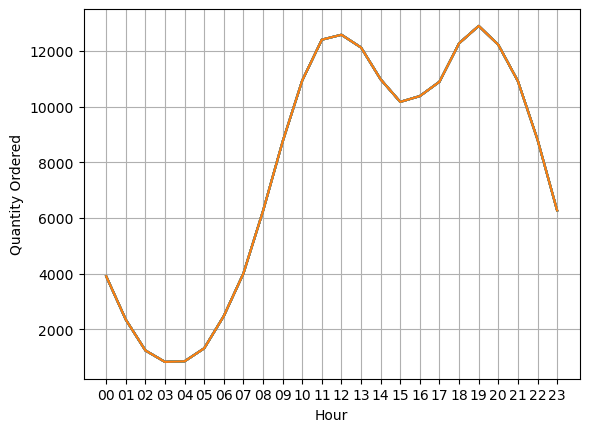

In [42]:
hours = [hour for hour, df in df.groupby('Order Hour')] #cria uma lista com as
#horas ordenadas. É necessário senão a ordem das horas do gráfico será a ordem
#em que aparececem no DataFrame

plt.plot(hours,df.groupby(['Order Hour']).count())
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Quantity Ordered')
plt.grid()
plt.show()

Podemos observar que a hora com maior quantidade de vendas é em torno de 19h, seguido do intervalo entre 11h e 12h. Esses seriam horários indicados para realização de propagandas e publicações promocionais.

#### Pergunta 4: Quais produtos são comumente vendidos juntos?

Inicialmente, vamos separar os itens que foram comprados na mesma Order ID

In [43]:
df_product_list = df.groupby('Order ID')['Product'].apply(list).to_frame()
list_prod = sorted(df_product_list['Product'], key=len, reverse=True)
list_prod[:10]

[['iPhone',
  'Lightning Charging Cable',
  'Apple Airpods Headphones',
  'Wired Headphones',
  'Google Phone'],
 ['Google Phone',
  'USB-C Charging Cable',
  'Wired Headphones',
  'AA Batteries (4-pack)'],
 ['Google Phone',
  'USB-C Charging Cable',
  'Wired Headphones',
  'USB-C Charging Cable'],
 ['Google Phone',
  'USB-C Charging Cable',
  'Bose SoundSport Headphones',
  'Wired Headphones'],
 ['iPhone',
  'Lightning Charging Cable',
  'Wired Headphones',
  'USB-C Charging Cable'],
 ['Google Phone',
  'USB-C Charging Cable',
  'Bose SoundSport Headphones',
  'Wired Headphones'],
 ['iPhone',
  'Lightning Charging Cable',
  'Apple Airpods Headphones',
  'Wired Headphones'],
 ['Google Phone',
  'USB-C Charging Cable',
  'Wired Headphones',
  'Wired Headphones'],
 ['Google Phone',
  'USB-C Charging Cable',
  'Wired Headphones',
  '27in FHD Monitor'],
 ['iPhone',
  'Lightning Charging Cable',
  'Apple Airpods Headphones',
  'Wired Headphones']]

Em seguida, vamos contar a ocorrencia dos pares de itens comprados juntos.

In [44]:
d = Counter()
for sub in list_prod:
    if len(list_prod) < 2:
        continue
    sub.sort()
    for comb in combinations(sub,2):
        d[comb] += 1

print(d.most_common()[:10])

[(('Lightning Charging Cable', 'iPhone'), 1015), (('Google Phone', 'USB-C Charging Cable'), 999), (('Wired Headphones', 'iPhone'), 462), (('Google Phone', 'Wired Headphones'), 423), (('Apple Airpods Headphones', 'iPhone'), 373), (('USB-C Charging Cable', 'Vareebadd Phone'), 368), (('Bose SoundSport Headphones', 'Google Phone'), 228), (('USB-C Charging Cable', 'Wired Headphones'), 205), (('Vareebadd Phone', 'Wired Headphones'), 149), (('Lightning Charging Cable', 'Wired Headphones'), 129)]


Assim, podemos ver que telefones e carregadores são os itens são os itens mais comumente vendidos juntos (Lightning Charging Cable e iPhone; Google Phone USB-C Charging Cable), seguidos de telefones e headphones (Wired Headphones e iPhone; Google Phone e Wired Headphones; Apple Airpods Headphones e iPhone).

#### Pergunta 5: Que produto vendeu mais? Pode ver algum motivo porqu este produto foi mais vendido?

In [45]:
most_sale = df.groupby(['Product'])[['Quantity Ordered']].sum().sort_values(by = 'Quantity Ordered', ascending = False)
most_sale

,Quantity Ordered
Product,
AAA Batteries (4-pack),31017
AA Batteries (4-pack),27635
USB-C Charging Cable,23975
Lightning Charging Cable,23217
Wired Headphones,20557
Apple Airpods Headphones,15661
Bose SoundSport Headphones,13457
27in FHD Monitor,7550
iPhone,6849


<Axes: xlabel='Product'>

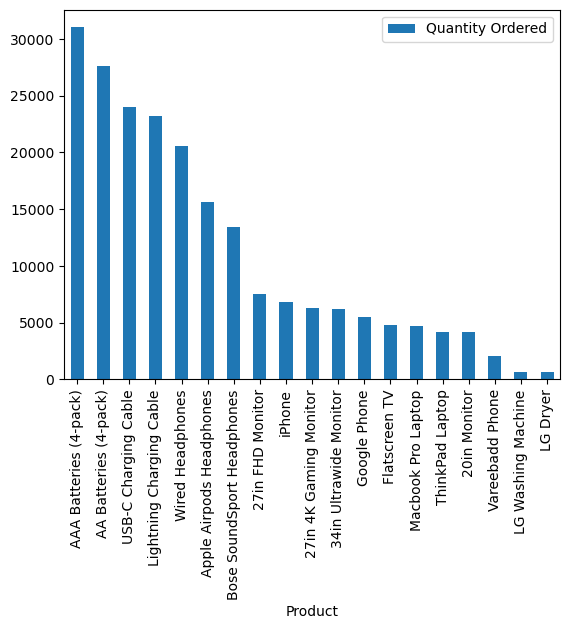

In [46]:
most_sale.plot.bar()

Observamos que baterias AAA e AA são as mais vendidas. Possivelmente pois são amplamente utilizados e baratos. Podemos verificar os preços individuais.

In [47]:
prod_price = df.groupby(['Product'])[['Price Each']].mean().sort_values(by = 'Price Each')
prod_price

,Price Each
Product,
AAA Batteries (4-pack),2.99
AA Batteries (4-pack),3.84
USB-C Charging Cable,11.95
Wired Headphones,11.99
Lightning Charging Cable,14.95
Bose SoundSport Headphones,99.99
20in Monitor,109.99
27in FHD Monitor,149.99
Apple Airpods Headphones,150.00


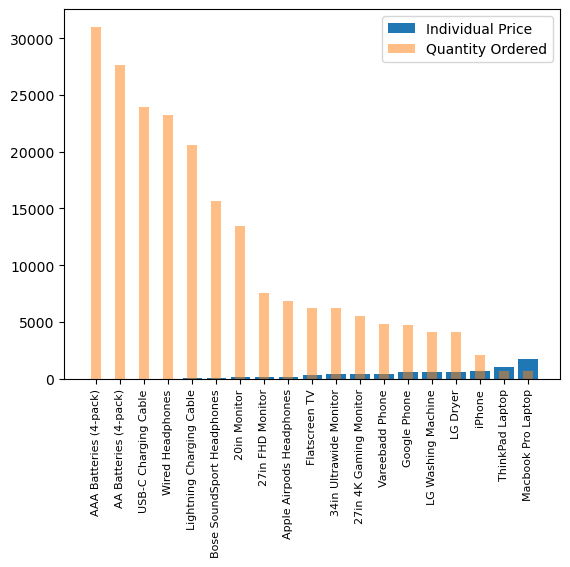

In [48]:
products = prod_price.index
plt.bar(products,prod_price['Price Each'], width = 0.8, label = 'Individual Price')
plt.bar(products,most_sale['Quantity Ordered'], width = 0.5*0.8, alpha = 0.5, label = 'Quantity Ordered')
plt.xticks(products, rotation = 'vertical', size = 8)
plt.legend()

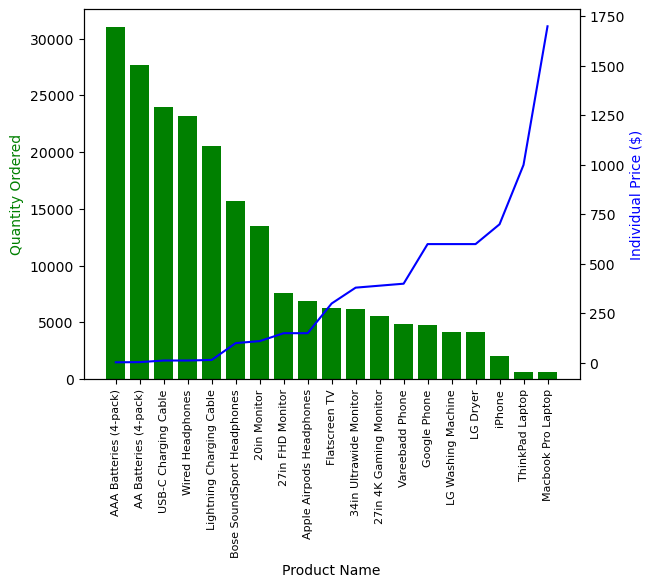

In [49]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, most_sale['Quantity Ordered'], color = 'g')
ax2.plot(products, prod_price['Price Each'], color = 'b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color = 'g')
ax2.set_ylabel('Individual Price ($)', color = 'b')

ax1.set_xticks(products)
ax1.set_xticklabels(products, rotation = 'vertical', size = 8)

plt.show()

### Conclusão
Com a análise dos dados, podemos propor mudanças que podem resultar em maior quantidade de vendas e, assim, maior lucro para a empresa.
- Podemos criar um progrma de descontos para os meses de janeiro, fevereiro, agosto e setembro, visndo atrair mais clientes e elevar o numero de vendas nestes meses;
- Podemos propor campanhas publicitárias nos horários entre 10h e 11h da manhã, e entre 17h e 18h da tarde, visando atrair ainda mais consumidores nos horários com maior número de vendas (12h e 19h);
- Podemos rearranjar os produtos para que aqueles que são comumente vendidos juntos estejam próximos uns dos outros, atraindo a atenção dos consumidores. Ainda, podemos criar promoções e pacotes com estes produtos.